<a href="https://colab.research.google.com/github/nhavd/CS2225.CH1501/blob/master/Lab-03/ImageAIDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
!pip install imageai
!pip install tensorflow==1.14.0
!pip install keras==2.0

     |████████████████████████████████| 109.2MB 96kB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 491kB 46.9MB/s 
     |████████████████████████████████| 3.2MB 37.1MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


     |████████████████████████████████| 194kB 2.8MB/s 
  Created wheel for keras: filename=Keras-2.0.0-cp36-none-any.whl size=227985 sha256=0f936fb1a885605a4935f3472fe9b77f05765552a846a9f5208c5835dcc27b2a
  Stored in directory: /root/.cache/pip/wheels/b0/a1/f4/f5f6a53dd71728cae0176b860f8c4304dd5d3fc2b8387ef59c
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.0 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


# Download pretrain and data sample

In [ ]:
!mkdir pretrain
!curl -L -o pretrain/resnet50_weights_tf_dim_ordering_tf_kernels.h5 https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_weights_tf_dim_ordering_tf_kernels.h5
!curl -L -o pretrain/inception_v3_weights_tf_dim_ordering_tf_kernels.h5 https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/inception_v3_weights_tf_dim_ordering_tf_kernels.h5
!curl -L -o pretrain/yolo.h5 https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5
!curl -L -o pretrain/resnet50_coco_best_v2.0.1.h5 https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   672  100   672    0     0   4023      0 --:--:-- --:--:-- --:--:--  4000
100 98.0M  100 98.0M    0     0  76.3M      0  0:00:01  0:00:01 --:--:-- 94.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   676  100   676    0     0   4828      0 --:--:-- --:--:-- --:--:--  4863
100 91.6M  100 91.6M    0     0  67.1M      0  0:00:01  0:00:01 --:--:-- 81.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   633  100   633    0     0   4137      0 --:--:-- --:--:-- --:--:--  4137
100  237M  100  237M    0     0  61.8M      0  0:00:03  0:00:03 --:--:-- 67.6M
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
!mkdir images
!curl -L -o images/1.jpg https://raw.githubusercontent.com/OlafenwaMoses/ImageAI/master/data-images/1.jpg
!curl -L -o images/2.jpg https://i.redd.it/o5fcis6nk1h31.jpg

mkdir: cannot create directory ‘images’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2067k  100 2067k    0     0  7359k      0 --:--:-- --:--:-- --:--:-- 7333k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  559k  100  559k    0     0  2591k      0 --:--:-- --:--:-- --:--:-- 2591k


In [ ]:
!mkdir video
!curl -L -o video/traffic.mp4 https://raw.githubusercontent.com/OlafenwaMoses/ImageAI/master/data-videos/traffic.mp4

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7627k  100 7627k    0     0  12.1M      0 --:--:-- --:--:-- --:--:-- 12.1M


# Demo

### Image Prediction

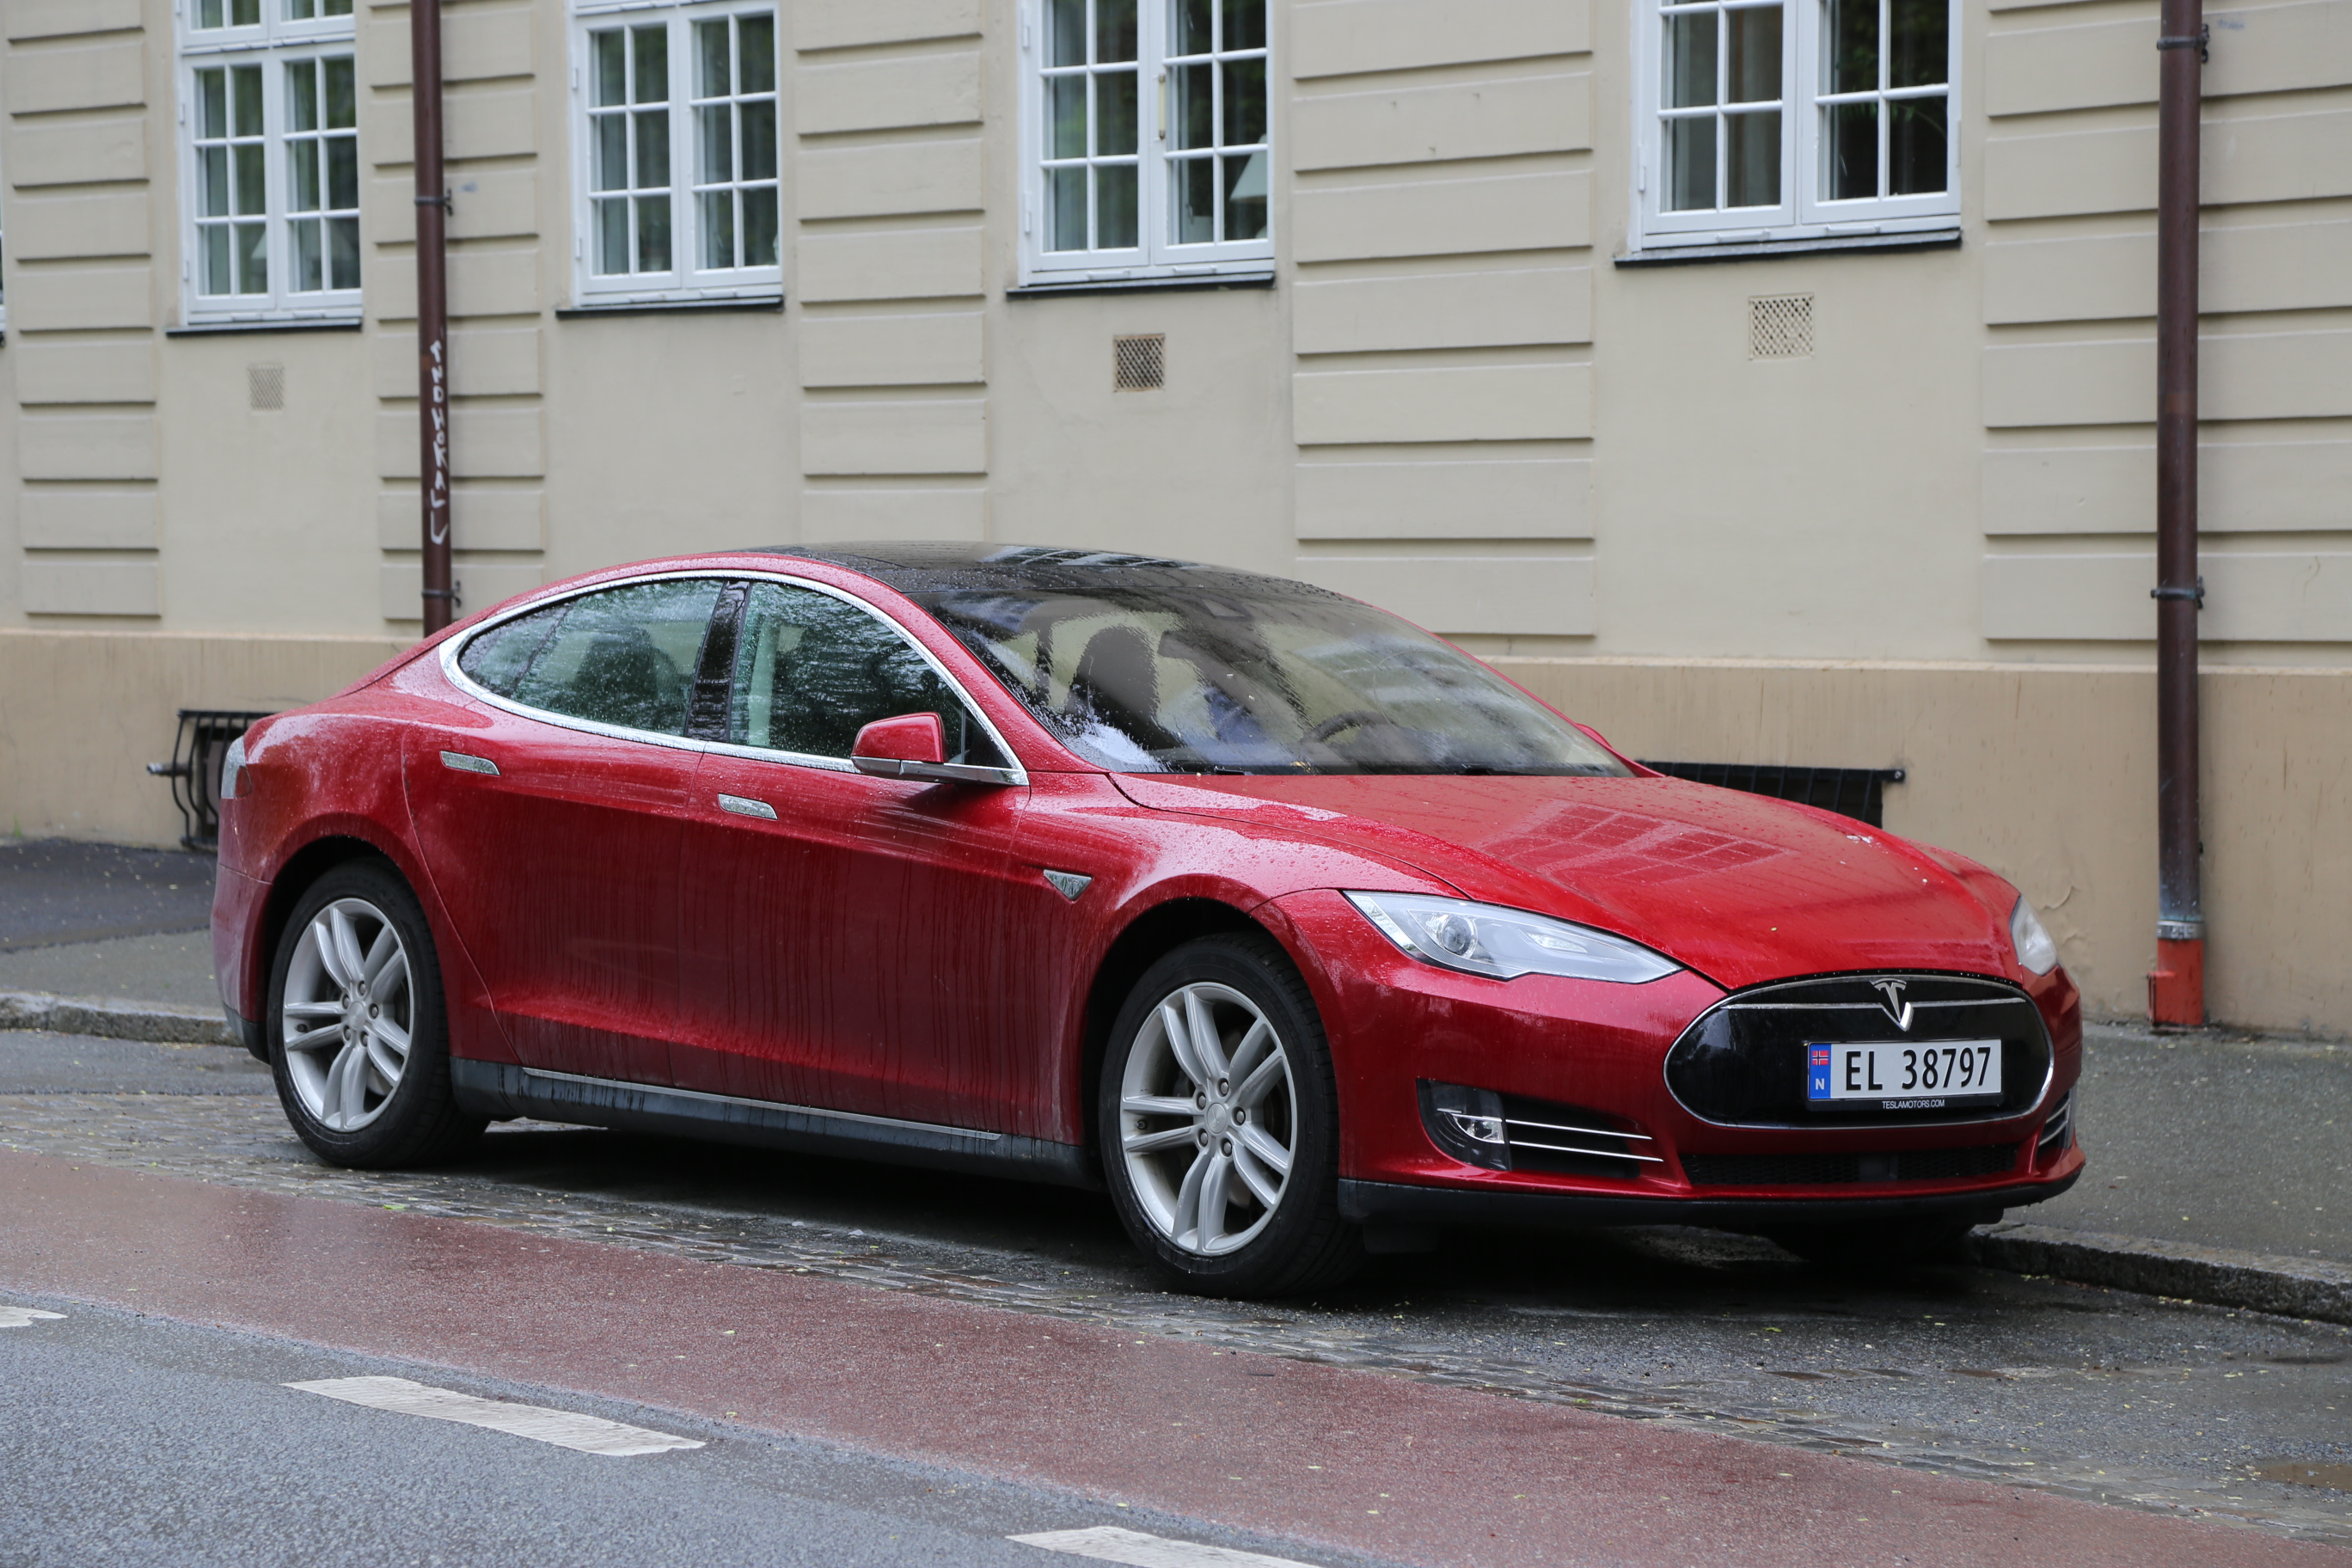

In [ ]:
from IPython.display import Image
import os
execution_path = os.getcwd()
Image(os.path.join(execution_path,'images/1.jpg'), width=700)

In [ ]:
from imageai.Prediction import ImagePrediction
import os

execution_path = os.getcwd()
prediction = ImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "pretrain/resnet50_weights_tf_dim_ordering_tf_kernels.h5"))

prediction.loadModel()
predictions, probabilities = prediction.predictImage(os.path.join(execution_path, "images/1.jpg"), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

convertible  :  52.45964527130127
sports_car  :  37.61269450187683
pickup  :  3.1751133501529694
car_wheel  :  1.8175018951296806
minivan  :  1.7487047240138054
grille  :  0.8300388231873512
beach_wagon  :  0.5185168236494064
racer  :  0.43373145163059235
cab  :  0.3695466322824359
limousine  :  0.23454534821212292


### Object Detection


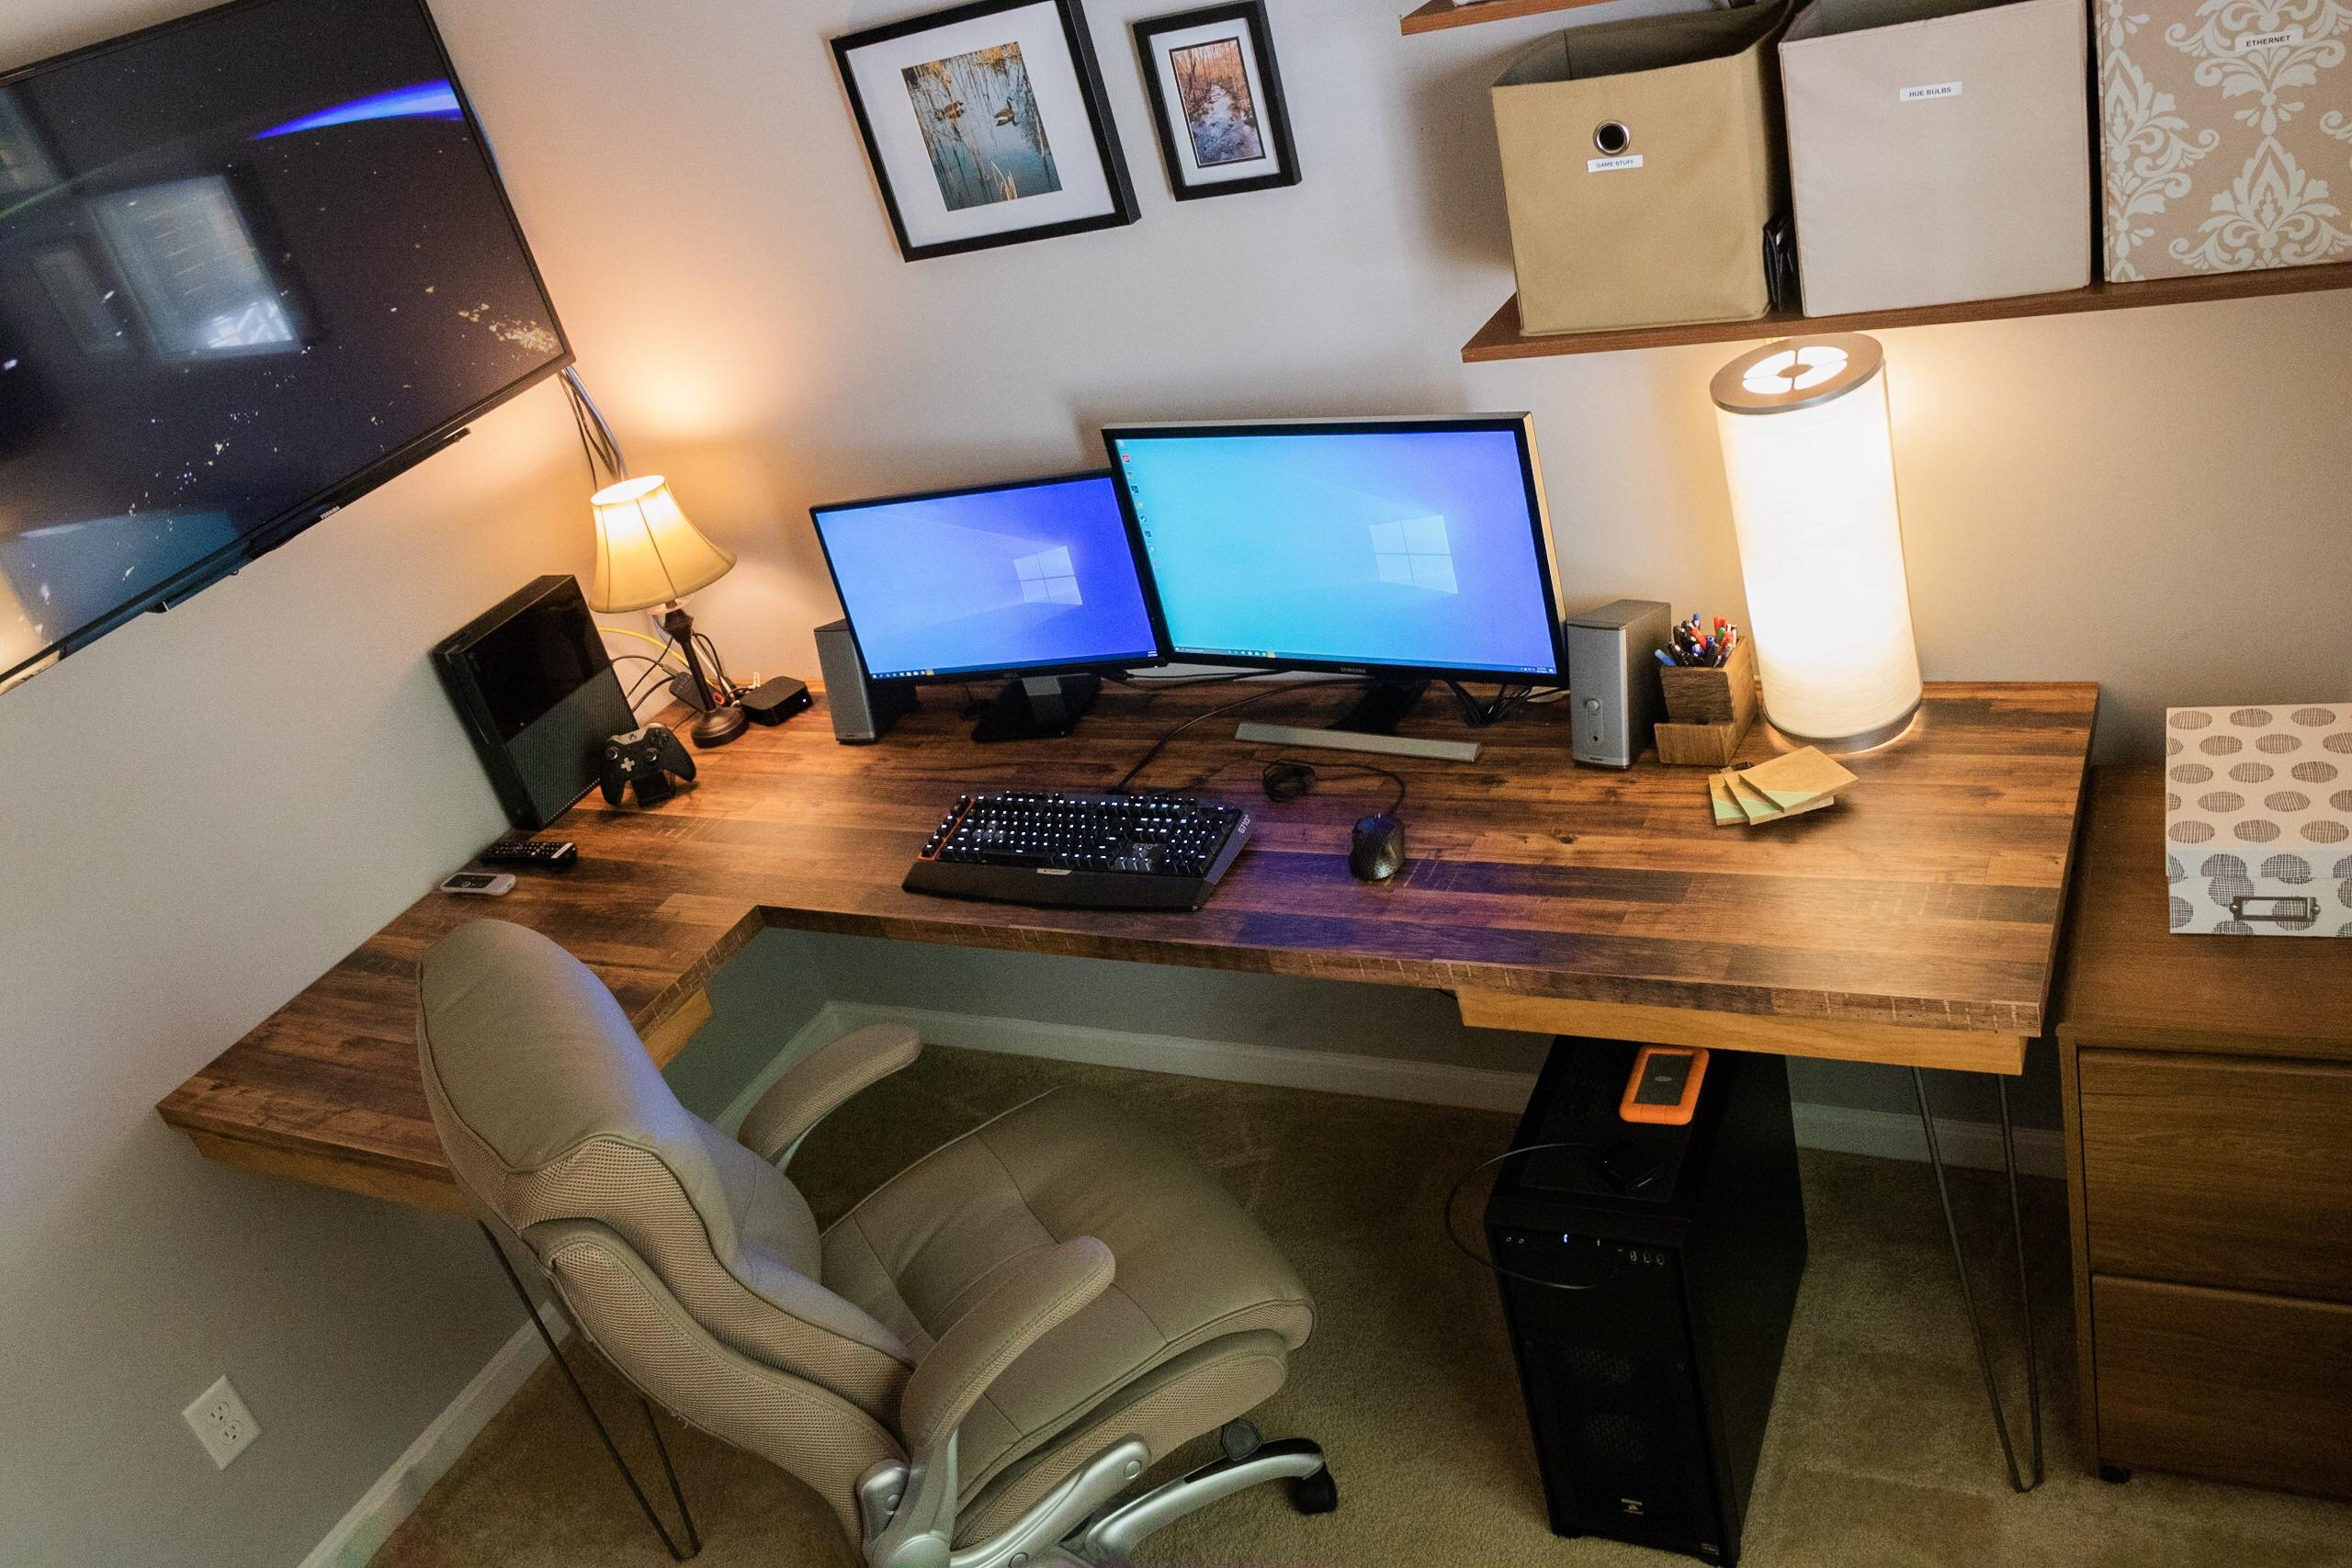

In [ ]:
from IPython.display import Image
import os
execution_path = os.getcwd()
Image(os.path.join(execution_path,'images/2.jpg'), width=700)

In [ ]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "pretrain/resnet50_coco_best_v2.0.1.h5")) # Download the model via this link https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "images/2.jpg"), output_image_path=os.path.join(execution_path , "images/2_detected.jpg"), minimum_percentage_probability=40)

for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

### Video Object Detection

In [ ]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "pretrain/yolo.h5")) # Download the model via this link https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "video/traffic.mp4"),
                                output_file_path=os.path.join(execution_path, "video/traffic_detected")
                                , frames_per_second=20, log_progress=True)
print(video_path)

Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processin